In [4]:
!pip install opencv-python

                                              0.0/38.2 MB ? eta -:--:--
                                              0.0/38.2 MB ? eta -:--:--
                                              0.1/38.2 MB 1.4 MB/s eta 0:00:27
                                              0.3/38.2 MB 2.2 MB/s eta 0:00:18
                                              0.5/38.2 MB 2.9 MB/s eta 0:00:14
                                              0.6/38.2 MB 3.1 MB/s eta 0:00:12
                                              0.8/38.2 MB 3.2 MB/s eta 0:00:12
     -                                        1.0/38.2 MB 3.2 MB/s eta 0:00:12
     -                                        1.1/38.2 MB 3.3 MB/s eta 0:00:12
     -                                        1.3/38.2 MB 3.4 MB/s eta 0:00:11
     -                                        1.5/38.2 MB 3.4 MB/s eta 0:00:11
     -                                        1.7/38.2 MB 3.5 MB/s eta 0:00:11
     -                                        1.9/38.2 MB 3.6 MB/s

In [11]:
import os
import sys
import datetime
import glob as glob
import numpy as np
import cv2
import keras
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
from keras.optimizers import SGD
import tensorflow
#from scipy.interpolate import spline deprecated
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
!pip install pandas

                                              0.0/10.7 MB ? eta -:--:--
                                             0.0/10.7 MB 660.6 kB/s eta 0:00:17
                                              0.1/10.7 MB 1.4 MB/s eta 0:00:08
     -                                        0.3/10.7 MB 2.2 MB/s eta 0:00:05
     -                                        0.5/10.7 MB 2.6 MB/s eta 0:00:04
     --                                       0.6/10.7 MB 3.0 MB/s eta 0:00:04
     --                                       0.8/10.7 MB 3.1 MB/s eta 0:00:04
     ---                                      1.0/10.7 MB 3.2 MB/s eta 0:00:04
     ----                                     1.1/10.7 MB 3.2 MB/s eta 0:00:03
     ----                                     1.3/10.7 MB 3.2 MB/s eta 0:00:03
     -----                                    1.4/10.7 MB 3.3 MB/s eta 0:00:03
     ------                                   1.6/10.7 MB 3.3 MB/s eta 0:00:03
     ------                                   1.8/10.7 MB 

In [10]:
!pip install matplotlib

                                              0.0/7.6 MB ? eta -:--:--
                                              0.0/7.6 MB ? eta -:--:--
                                              0.0/7.6 MB 487.6 kB/s eta 0:00:16
     -                                        0.2/7.6 MB 1.8 MB/s eta 0:00:05
     -                                        0.4/7.6 MB 2.3 MB/s eta 0:00:04
     --                                       0.5/7.6 MB 2.6 MB/s eta 0:00:03
     ---                                      0.7/7.6 MB 2.8 MB/s eta 0:00:03
     ----                                     0.9/7.6 MB 2.9 MB/s eta 0:00:03
     -----                                    1.0/7.6 MB 3.1 MB/s eta 0:00:03
     ------                                   1.2/7.6 MB 3.2 MB/s eta 0:00:03
     -------                                  1.4/7.6 MB 3.2 MB/s eta 0:00:02
     --------                                 1.5/7.6 MB 3.3 MB/s eta 0:00:02
     ---------                                1.7/7.6 MB 3.3 MB/s eta 0:00:0

In [12]:
keras.__version__

'2.10.0'

In [13]:
tensorflow.__version__

'2.10.1'

In [14]:
datagen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

In [18]:
img = load_img('images/0010007.jpg')
plt.figure(figsize = (3,3))
plt.imshow(img)
plt.axis('off')
plt.title('Danaus Plexippus')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './images/0010007.jpg'

In [6]:
x = img_to_array(img)
x2 = x.reshape((1,) + x.shape)

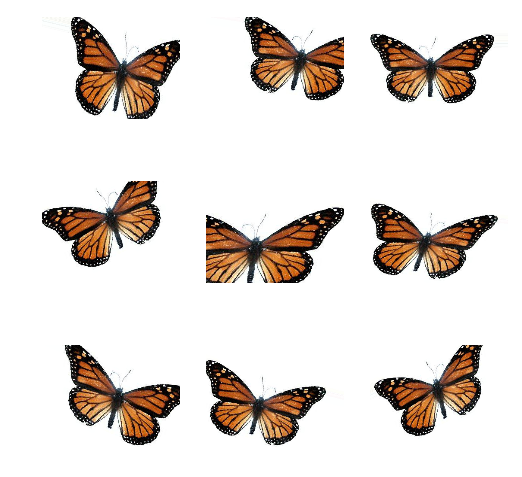

In [7]:
i = 0
fig = plt.figure(figsize = (6,6))
plt.title('Pre-processed')
for batch in datagen.flow(x2, batch_size = 1):
    i += 1
    if i > 9:
        break
    temp = batch.reshape(x.shape)
    plt.subplot(3, 3, i)
    plt.imshow(temp.astype('uint8'))
    plt.axis('off')
plt.show()

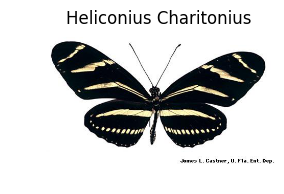

In [8]:
img = load_img('images/002_0087.jpg')
plt.figure(figsize = (3,3))
plt.imshow(img)
plt.axis('off')
plt.title('Heliconius Charitonius')
plt.show()

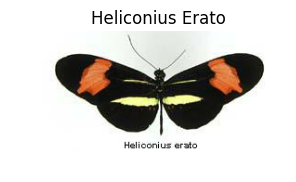

In [9]:
img = load_img('images/003_0020.jpg')
plt.figure(figsize = (3,3))
plt.imshow(img)
plt.axis('off')
plt.title('Heliconius Erato')
plt.show()

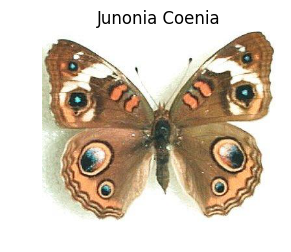

In [10]:
img = load_img('images/004_0010.jpg')
plt.figure(figsize = (3,3))
plt.imshow(img)
plt.axis('off')
plt.title('Junonia Coenia')
plt.show()

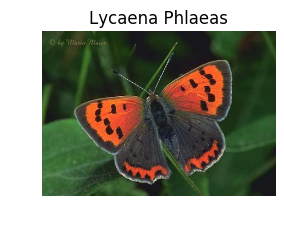

In [11]:
img = load_img('images/005_0010.jpg')
plt.figure(figsize = (3,3))
plt.imshow(img)
plt.axis('off')
plt.title('Lycaena Phlaeas')
plt.show()

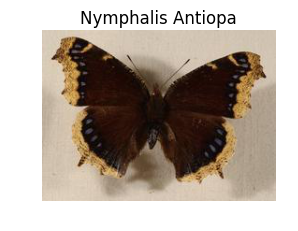

In [12]:
img = load_img('images/006_0061.jpg')
plt.figure(figsize = (3,3))
plt.imshow(img)
plt.axis('off')
plt.title('Nymphalis Antiopa')
plt.show()

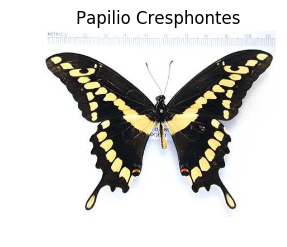

In [13]:
img = load_img('images/007_0017.jpg')
plt.figure(figsize = (3,3))
plt.imshow(img)
plt.axis('off')
plt.title('Papilio Cresphontes')
plt.show()

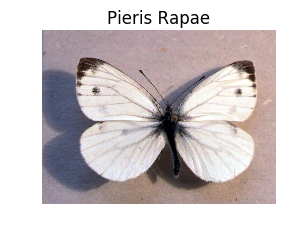

In [14]:
img = load_img('images/008_0034.jpg')
plt.figure(figsize = (3,3))
plt.imshow(img)
plt.axis('off')
plt.title('Pieris Rapae')
plt.show()

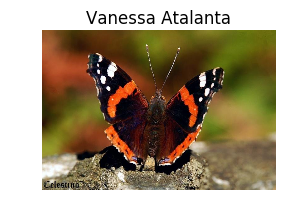

In [15]:
img = load_img('images/009_0044.jpg')
plt.figure(figsize = (3,3))
plt.imshow(img)
plt.axis('off')
plt.title('Vanessa Atalanta')
plt.show()

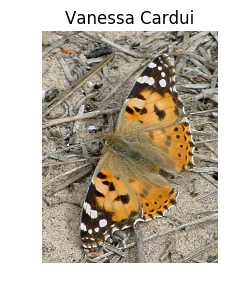

In [16]:
img = load_img('images/010_0033.jpg')
plt.figure(figsize = (3,3))
plt.imshow(img)
plt.axis('off')
plt.title('Vanessa Cardui')
plt.show()

In [17]:
# default settings
img_width, img_height = 224, 224

train_dir = 'data/train'
validate_dir = 'data/validate'
nb_epochs = 20
batch_size = 32
nb_classes = len(glob.glob(train_dir + '/*'))

In [18]:
# get number of images in training directory
nb_train_samples = 0
for r, dirs, files in os.walk(train_dir):
    for dr in dirs:
        nb_train_samples += len(glob.glob(os.path.join(r, dr + "/*")))
print(nb_train_samples)

592


In [19]:
# get number of images in validation directory
nb_validate_samples = 0
for r, dirs, files in os.walk(validate_dir):
    for dr in dirs:
        nb_validate_samples += len(glob.glob(os.path.join(r, dr + "/*")))
print(nb_validate_samples)

169


In [20]:
# data pre-processing for training
train_datagen =  ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest',
    horizontal_flip = True)

In [21]:
# data pre-processing for validation
validate_datagen =  ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest',
    horizontal_flip = True)

In [22]:
# generate and store training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size)

Found 592 images belonging to 10 classes.


In [23]:
# generate and store validation data
validate_generator = validate_datagen.flow_from_directory(
    validate_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size)

Found 169 images belonging to 10 classes.


In [24]:
# set up transfer learning on pre-trained ImageNet VGG16 model - remove fully connected layer and replace
# with softmax for classifying 10 classes
vgg16_model = VGG16(weights = 'imagenet', include_top = False)
x = vgg16_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(nb_classes, activation = 'softmax')(x)
model = Model(input = vgg16_model.input, output = predictions)

In [25]:
# freeze all layers of the pre-trained model
for layer in vgg16_model.layers:
    layer.trainable = False

In [26]:
# compile the new model using a RMSProp optimizer
model.compile(optimizer = 'rmsprop',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

In [27]:
# fit the model, log the results and the training time
now = datetime.datetime.now
t = now()
transfer_learning_history = model.fit_generator(
    train_generator,
    nb_epoch = nb_epochs,
    samples_per_epoch = nb_train_samples,
    validation_data = validate_generator,
    nb_val_samples = nb_validate_samples,
    class_weight='auto')
print('Training time: %s' % (now() - t))

Epoch 1/20
592/592 [==============================] - 365s - loss: 2.0966 - acc: 0.2652 - val_loss: 1.7576 - val_acc: 0.3136
Epoch 2/20
592/592 [==============================] - 362s - loss: 1.4916 - acc: 0.5439 - val_loss: 1.2600 - val_acc: 0.6746
Epoch 3/20
592/592 [==============================] - 362s - loss: 1.1177 - acc: 0.7111 - val_loss: 0.9650 - val_acc: 0.7041
Epoch 4/20
592/592 [==============================] - 360s - loss: 0.8970 - acc: 0.7432 - val_loss: 1.0384 - val_acc: 0.6331
Epoch 5/20
592/592 [==============================] - 362s - loss: 0.7633 - acc: 0.8057 - val_loss: 0.8020 - val_acc: 0.7515
Epoch 6/20
592/592 [==============================] - 359s - loss: 0.6177 - acc: 0.8581 - val_loss: 0.6291 - val_acc: 0.7988
Epoch 7/20
592/592 [==============================] - 357s - loss: 0.5439 - acc: 0.8412 - val_loss: 0.6455 - val_acc: 0.8047
Epoch 8/20
592/592 [==============================] - 357s - loss: 0.4602 - acc: 0.8733 - val_loss: 0.8316 - val_acc: 0.6864


In [28]:
# evaluate the performance the new model and report the results
score = model.evaluate_generator(validate_generator, nb_validate_samples/batch_size)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.421005994081
Test Accuracy: 0.875


In [29]:
# save transfer learning model for offline prediction purposes
model.save('butterflies_vgg16_model_tl.h5')

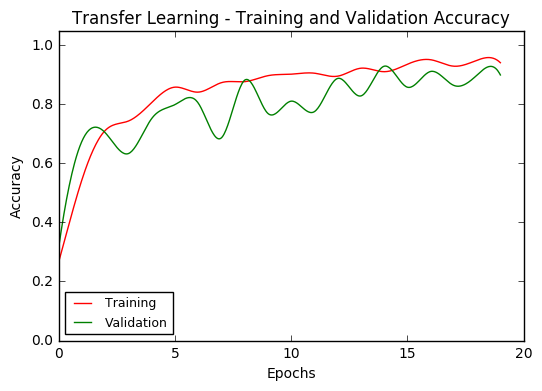

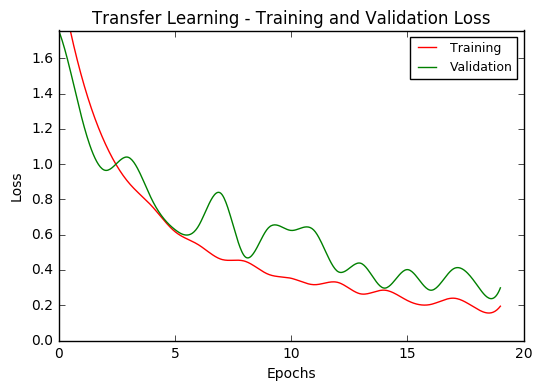

In [30]:
xfer_acc = transfer_learning_history.history['acc']
val_acc = transfer_learning_history.history['val_acc']
xfer_loss = transfer_learning_history.history['loss']
val_loss = transfer_learning_history.history['val_loss']
epochs = range(len(xfer_acc))

x = np.array(epochs)
y = np.array(xfer_acc)
x_smooth = np.linspace(x.min(), x.max(), 500)
y_smooth = spline(x, y, x_smooth)
plt.plot(x_smooth, y_smooth, 'r-', label = 'Training')

x1 = np.array(epochs)
y1 = np.array(val_acc)
x1_smooth = np.linspace(x1.min(), x1.max(), 500)
y1_smooth = spline(x1, y1, x1_smooth)

plt.plot(x1_smooth, y1_smooth, 'g-', label = 'Validation')
plt.title('Transfer Learning - Training and Validation Accuracy')
plt.legend(loc = 'lower left', fontsize = 9)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0,1.05)

plt.figure()
x = np.array(epochs)
y = np.array(xfer_loss)
x_smooth = np.linspace(x.min(), x.max(), 500)
y_smooth = spline(x, y, x_smooth)
plt.plot(x_smooth, y_smooth, 'r-', label = 'Training')

x1 = np.array(epochs)
y1 = np.array(val_loss)
x1_smooth = np.linspace(x1.min(), x1.max(), 500)
y1_smooth = spline(x1, y1, x1_smooth)

plt.plot(x1_smooth, y1_smooth, 'g-', label = 'Validation')
plt.title('Transfer Learning - Training and Validation Loss')
plt.legend(loc = 'upper right', fontsize = 9)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0,max(y1))
plt.show()

In [31]:
validate_generator.total_batches_seen

331

In [32]:
num_images = len(glob.glob("butterflies_test/*.jpg"))

In [33]:
predict_files = glob.glob("butterflies_test/*.jpg")

In [34]:
im = cv2.imread(predict_files[0])
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (256, 256)).astype(np.float32)
im = np.expand_dims(im, axis = 0)/255

In [35]:
predictor, image_id = [], []
for i in predict_files:
    im = cv2.imread(i)
    im = cv2.resize(cv2.cvtColor(im, cv2.COLOR_BGR2RGB), (256, 256)).astype(np.float32) / 255.0
    im = np.expand_dims(im, axis =0)
    outcome = [np.argmax(model.predict(im))]
    predictor.extend(list(outcome))
    image_id.extend([i.rsplit("\\")[-1]])

In [36]:
final = pd.DataFrame()
final["id"] = image_id
final["Butterfly"] = predictor
final.head(num_images)

,id,Butterfly
0,Danaus_Plexippus_001_0002.jpg,0
1,Danaus_Plexippus_001_0008.jpg,0
2,Danaus_Plexippus_001_0022.jpg,0
3,Danaus_Plexippus_001_0060.jpg,0
4,Danaus_Plexippus_001_0068.jpg,0
5,Danaus_Plexippus_001_0078.jpg,0
6,Danaus_Plexippus_001_0079.jpg,0
7,Heliconius_Charitonius_002_0002.jpg,1
8,Heliconius_Charitonius_002_0007.jpg,1
9,Heliconius_Charitonius_002_0015.jpg,1


In [37]:
classes = train_generator.class_indices
classes = {value : key for key, value in classes.items()}

In [38]:
final["Butterfly"] = final["Butterfly"].apply(lambda x: classes[x])
final.head(num_images)

,id,Butterfly
0,Danaus_Plexippus_001_0002.jpg,Danaus_Plexippus
1,Danaus_Plexippus_001_0008.jpg,Danaus_Plexippus
2,Danaus_Plexippus_001_0022.jpg,Danaus_Plexippus
3,Danaus_Plexippus_001_0060.jpg,Danaus_Plexippus
4,Danaus_Plexippus_001_0068.jpg,Danaus_Plexippus
5,Danaus_Plexippus_001_0078.jpg,Danaus_Plexippus
6,Danaus_Plexippus_001_0079.jpg,Danaus_Plexippus
7,Heliconius_Charitonius_002_0002.jpg,Heliconius_Charitonius
8,Heliconius_Charitonius_002_0007.jpg,Heliconius_Charitonius
9,Heliconius_Charitonius_002_0015.jpg,Heliconius_Charitonius


In [39]:
for i, layer in enumerate(model.layers):
   print(i, layer.name)

0 input_1
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool
19 globalaveragepooling2d_1
20 dense_1
21 dense_2


In [40]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, None, None, 3) 0                                            
____________________________________________________________________________________________________
block1_conv1 (Convolution2D)     (None, None, None, 64 1792        input_1[0][0]                    
____________________________________________________________________________________________________
block1_conv2 (Convolution2D)     (None, None, None, 64 36928       block1_conv1[0][0]               
____________________________________________________________________________________________________
block1_pool (MaxPooling2D)       (None, None, None, 64 0           block1_conv2[0][0]               
___________________________________________________________________________________________

In [41]:
# Step 1 - Set up fine tuning on pre-trained ImageNet vgg16 model - train all lower 94 layers
for layer in model.layers:
    layer.trainable = True
    
# Step 2 - Compile the revised model using SGD optimizer with a learing rate of 0.0001 and a momentum of 0.9
model.compile(optimizer = SGD(lr = 0.0001, momentum=0.9), 
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

# Step 3 - Fit the revised model, log the results and the training time
now = datetime.datetime.now
t = now()
fine_tuning_history = model.fit_generator(
    train_generator,
    nb_epoch = nb_epochs,
    samples_per_epoch = nb_train_samples,
    validation_data = validate_generator,
    nb_val_samples = nb_validate_samples,
    class_weight='auto')
print('Training time: %s' % (now() - t))

Epoch 1/20
592/592 [==============================] - 918s - loss: 0.1056 - acc: 0.9797 - val_loss: 0.2059 - val_acc: 0.9290
Epoch 2/20
592/592 [==============================] - 868s - loss: 0.0998 - acc: 0.9628 - val_loss: 0.1243 - val_acc: 0.9645
Epoch 3/20
592/592 [==============================] - 914s - loss: 0.0608 - acc: 0.9797 - val_loss: 0.1428 - val_acc: 0.9467
Epoch 4/20
592/592 [==============================] - 913s - loss: 0.0289 - acc: 0.9966 - val_loss: 0.1527 - val_acc: 0.9467
Epoch 5/20
592/592 [==============================] - 870s - loss: 0.0211 - acc: 0.9983 - val_loss: 0.1304 - val_acc: 0.9645
Epoch 6/20
592/592 [==============================] - 920s - loss: 0.0286 - acc: 0.9932 - val_loss: 0.1534 - val_acc: 0.9467
Epoch 7/20
592/592 [==============================] - 917s - loss: 0.0258 - acc: 0.9899 - val_loss: 0.1320 - val_acc: 0.9645
Epoch 8/20
592/592 [==============================] - 913s - loss: 0.0184 - acc: 0.9966 - val_loss: 0.1152 - val_acc: 0.9586


In [42]:
# evaluate the performance the new model and report the results
score = model.evaluate_generator(validate_generator, nb_validate_samples/batch_size)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.0260031372309
Test Accuracy: 0.96875


In [43]:
# save fine-tuning model for offline prediction purposes
model.save('butterflies_vgg16_model_ft.h5')

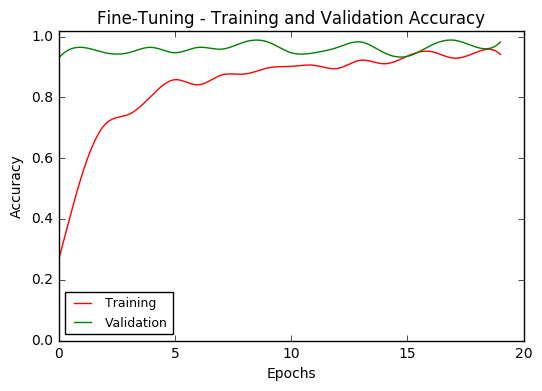

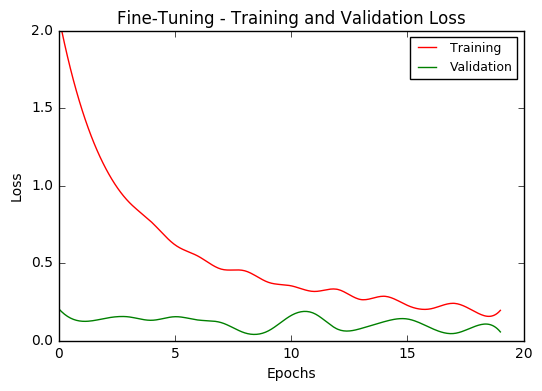

In [44]:
ft_acc = fine_tuning_history.history['acc']
val_acc = fine_tuning_history.history['val_acc']
ft_loss = fine_tuning_history.history['loss']
val_loss = fine_tuning_history.history['val_loss']
epochs = range(len(ft_acc))

x = np.array(epochs)
y = np.array(xfer_acc)
x_smooth = np.linspace(x.min(), x.max(), 300)
y_smooth = spline(x, y, x_smooth)
plt.plot(x_smooth, y_smooth, 'r-', label = 'Training')

x1 = np.array(epochs)
y1 = np.array(val_acc)
x1_smooth = np.linspace(x1.min(), x1.max(), 300)
y1_smooth = spline(x1, y1, x1_smooth)

plt.plot(x1_smooth, y1_smooth, 'g-', label = 'Validation')
plt.title('Fine-Tuning - Training and Validation Accuracy')
plt.legend(loc = 'lower left', fontsize = 9)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0,1.02)

plt.figure()
x = np.array(epochs)
y = np.array(xfer_loss)
x_smooth = np.linspace(x.min(), x.max(), 300)
y_smooth = spline(x, y, x_smooth)
plt.plot(x_smooth, y_smooth, 'r-', label = 'Training')

x1 = np.array(epochs)
y1 = np.array(val_loss)
x1_smooth = np.linspace(x1.min(), x1.max(), 300)
y1_smooth = spline(x1, y1, x1_smooth)

plt.plot(x1_smooth, y1_smooth, 'g-', label = 'Validation')
plt.title('Fine-Tuning - Training and Validation Loss')
plt.legend(loc = 'upper right', fontsize = 9)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0,2)
plt.show()

In [45]:
validate_generator.total_batches_seen

662

In [46]:
# predict unseen images
predict_files = glob.glob("butterflies_test/*.jpg")

In [47]:
im = cv2.imread(predict_files[0])
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (256, 256)).astype(np.float32)
im = np.expand_dims(im, axis = 0)/255

In [48]:
predictor, image_id = [], []
for i in predict_files:
    im = cv2.imread(i)
    im = cv2.resize(cv2.cvtColor(im, cv2.COLOR_BGR2RGB), (256, 256)).astype(np.float32) / 255.0
    im = np.expand_dims(im, axis =0)
    outcome = [np.argmax(model.predict(im))]
    predictor.extend(list(outcome))
    image_id.extend([i.rsplit("\\")[-1]])

In [49]:
final = pd.DataFrame()
final["id"] = image_id
final["Butterfly"] = predictor 
final.head(num_images)

,id,Butterfly
0,Danaus_Plexippus_001_0002.jpg,0
1,Danaus_Plexippus_001_0008.jpg,0
2,Danaus_Plexippus_001_0022.jpg,0
3,Danaus_Plexippus_001_0060.jpg,0
4,Danaus_Plexippus_001_0068.jpg,0
5,Danaus_Plexippus_001_0078.jpg,0
6,Danaus_Plexippus_001_0079.jpg,0
7,Heliconius_Charitonius_002_0002.jpg,1
8,Heliconius_Charitonius_002_0007.jpg,1
9,Heliconius_Charitonius_002_0015.jpg,1


In [50]:
classes = train_generator.class_indices
classes = {value : key for key, value in classes.items()}

In [51]:
final["Butterfly"] = final["Butterfly"].apply(lambda x: classes[x])
final.head(num_images)

,id,Butterfly
0,Danaus_Plexippus_001_0002.jpg,Danaus_Plexippus
1,Danaus_Plexippus_001_0008.jpg,Danaus_Plexippus
2,Danaus_Plexippus_001_0022.jpg,Danaus_Plexippus
3,Danaus_Plexippus_001_0060.jpg,Danaus_Plexippus
4,Danaus_Plexippus_001_0068.jpg,Danaus_Plexippus
5,Danaus_Plexippus_001_0078.jpg,Danaus_Plexippus
6,Danaus_Plexippus_001_0079.jpg,Danaus_Plexippus
7,Heliconius_Charitonius_002_0002.jpg,Heliconius_Charitonius
8,Heliconius_Charitonius_002_0007.jpg,Heliconius_Charitonius
9,Heliconius_Charitonius_002_0015.jpg,Heliconius_Charitonius


In [52]:
final.to_csv("csv/butterflies_with_pretrained_vgg16_model_ft_test", index=False)